# Aykırı veri işlemleri

- genellikle sürekli veriler için uygulanır. (sürekli veriler sayısaldırlar?)
- kategorik verilerde uygulanması pek mantıklı değildir.
- veri setinde işlemler tamamlanmış olmalıdır.
aykırı veri işlemlerini yapmak için öncelikle eksik verilerle ilgilenmeliyiz.


In [1]:
import pandas as pd
import numpy as np

In [3]:
veri_seti = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

In [4]:
veri_seti

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
veri_seti.Age.isnull().sum()

177

In [12]:
veri_seti.Age.mean() #veri setindeki age sütununun ortalamasını verir.

29.69911764705882

In [40]:
set = veri_seti.Age.fillna(value=veri_seti.Age.mean()) #yaşın ortalma değeri ile doldurduk.

In [15]:
set.isnull().sum()

0

In [16]:
set.describe()
#min değer ile %25'lik değer arsaındaki fark çok fazla
#mex değer ile %75'lik değer arasındaki değer çok fazla.
#ama ortadaki değerler birbirinden çok da fazla değil. (Q1, Q2, Q3 ortadaki değerlerdir.)
#bu durumda burada bir aykırı değer var demek mümkündür.
# %25=Q1 ; %50=Q2 ; %75=Q3

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

Aykırı durumların tespit edilmesinde boxplot kullanılabilir.
IQR değeri Q3 ile Q1 arasındaki değerdir. bu sayede outliner değerileri bulabiliriz.
İki yöntemden bahsedilebilir:
1. IQR yöntemi
2. Z-Skoru yöntemi

# 1. yöntem: IQR yöntemi

In [17]:
%matplotlib inline

<Axes: >

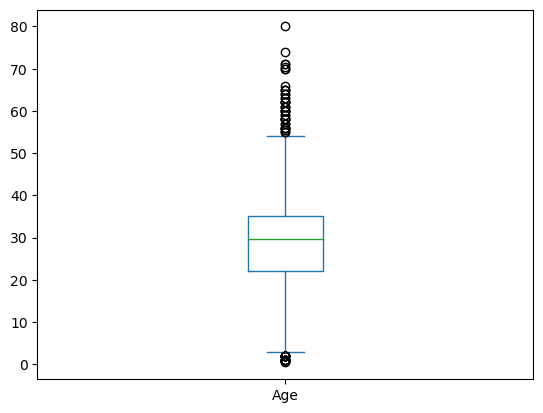

In [18]:
set.plot.box()

In [24]:
q1=set.quantile(0.25)
q3=set.quantile(0.75)
iqr=q3-q1

In [25]:
q1

22.0

In [26]:
q3

35.0

In [22]:
iqr

13.0

In [27]:
q3 + 1.5*iqr

54.5

In [28]:
q1 - 1.5*iqr

2.5

In [29]:
alt_sinir = q1 - 1.5*iqr
ust_sinir = q3 + 1.5*iqr
#bu değerler arasında olmayan veriler aykırı verilerdir.

In [33]:
set[set<alt_sinir] #alt sınırdan küçük aykırı veriler

7      2.00
16     2.00
78     0.83
119    2.00
164    1.00
172    1.00
183    1.00
205    2.00
297    2.00
305    0.92
340    2.00
381    1.00
386    1.00
469    0.75
479    2.00
530    2.00
642    2.00
644    0.75
755    0.67
788    1.00
803    0.42
824    2.00
827    1.00
831    0.83
Name: Age, dtype: float64

In [34]:
set[set>ust_sinir] #üst sınırdan büyük aykırı veriler

11     58.0
15     55.0
33     66.0
54     65.0
94     59.0
96     71.0
116    70.5
152    55.5
170    61.0
174    56.0
195    58.0
232    59.0
252    62.0
268    58.0
275    63.0
280    65.0
326    61.0
366    60.0
438    64.0
456    65.0
467    56.0
483    63.0
487    58.0
492    55.0
493    71.0
545    64.0
555    62.0
570    62.0
587    60.0
625    61.0
626    57.0
630    80.0
647    56.0
659    58.0
672    70.0
684    60.0
694    60.0
745    70.0
772    57.0
829    62.0
851    74.0
879    56.0
Name: Age, dtype: float64

In [35]:
# aykırı verileri sınır değerlerine taşıyalım:
set[set<alt_sinir] = alt_sinir
set[set>ust_sinir] = ust_sinir

In [37]:
set.describe()

count    891.000000
mean      29.376817
std       12.062035
min        2.500000
25%       22.000000
50%       29.699118
75%       35.000000
max       54.500000
Name: Age, dtype: float64

<Axes: >

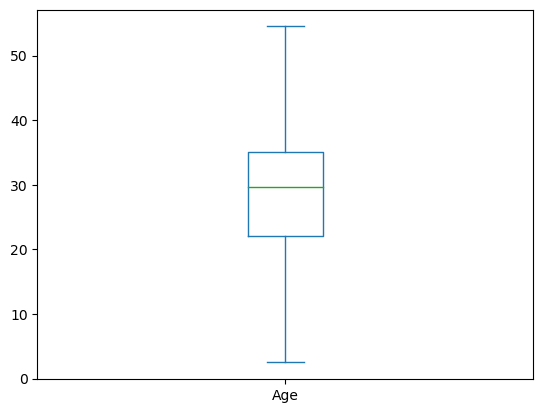

In [38]:
set.plot.box()

# 2. yöntem: Z-Skoru yöntemi
- verilerin normal dağılıma uyduğu varsayılır.
eğer çalıştığımız veriler normal dağılıma uymuyorsa bu yöntem düzgün çalışmaz.
normal dağılıma uymuyorsa, normal dağılıma uymuyorsa, normal dağılıma uyması için bir takım işlemler yapılabilir.

<Axes: ylabel='Frequency'>

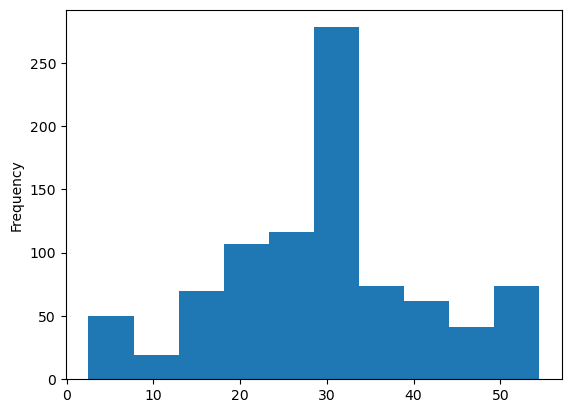

In [39]:
set.plot.hist() #dağılımını görmek için kullandık.
#aşağıdaki grafik aykırı verileri olmayan veri setinin dağılım grafiği

<Axes: ylabel='Frequency'>

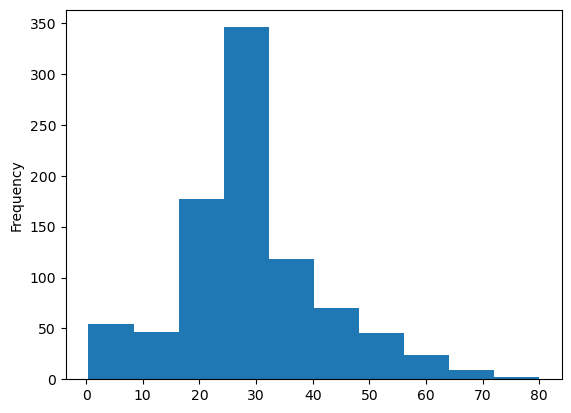

In [41]:
set.plot.hist()
#aşağıdaki grafik aykırı verileri olman veri setinin dağılım grafiği

In [42]:
set.describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [46]:
set.std() #standart sapma

13.002015226002884

In [47]:
set.mean() #ortalama

29.69911764705882

In [49]:
#ortalamadan 3 std aşanları kırpmaya çalışacağız:
set[set>set.std()*3]

6      54.0
11     58.0
15     55.0
30     40.0
33     66.0
       ... 
862    48.0
865    42.0
871    47.0
873    47.0
879    56.0
Name: Age, Length: 163, dtype: float64